<a href="https://colab.research.google.com/github/chirudukuru/DmDw1/blob/main/pca3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## For Clustering:

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn import preprocessing
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid19india.csv to covid19india.csv


In [ ]:
import io
df= pd.read_csv(io.BytesIO(uploaded['covid19india.csv']))

In [ ]:
df
df.rename(columns={"State/UnionTerritory":"State"},inplace=True)
df.head()

,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,3/2/2020,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
df.rename(columns={"ConfirmedIndianNational":"CnfInd"},inplace=True)

In [ ]:

df.rename(columns={"ConfirmedForeignNational":"CnfFrgNat"},inplace=True)
df.head()

,Date,Time,State,CnfInd,CnfFrgNat,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,1/2/2020,6:00 PM,Kerala,2,0,0,0,2
3,2/2/2020,6:00 PM,Kerala,3,0,0,0,3
4,3/2/2020,6:00 PM,Kerala,3,0,0,0,3


In [ ]:
from sklearn.preprocessing import LabelEncoder
le_Date = LabelEncoder()
le_Time= LabelEncoder()
le_State = LabelEncoder()
le_CnfInd = LabelEncoder()
le_CnfFrgNat = LabelEncoder()

In [ ]:
df['Date'] = le_Date.fit_transform(df['Date'])
df['Time'] = le_Time.fit_transform(df['Time'])
df['State'] = le_State.fit_transform(df['State'])
df['CnfInd'] = le_CnfInd.fit_transform(df['CnfInd'])
df['CnfFrgNat'] = le_CnfFrgNat.fit_transform(df['CnfFrgNat'])

In [ ]:
df

,Date,Time,State,CnfInd,CnfFrgNat,Cured,Deaths,Confirmed
0,177,2,19,2,1,0,0,1
1,184,2,19,2,1,0,0,1
2,0,2,19,21,1,0,0,2
3,88,2,19,31,1,0,0,3
4,169,2,19,31,1,0,0,3
...,...,...,...,...,...,...,...,...
6556,119,4,35,0,0,144073,1052,174774
6557,119,4,37,0,0,15883,251,22834
6558,119,4,40,0,0,29201,501,41777
6559,119,4,39,0,0,289594,5135,358893


In [ ]:
df.isnull().sum()

Date         0
Time         0
State        0
CnfInd       0
CnfFrgNat    0
Cured        0
Deaths       0
Confirmed    0
dtype: int64

In [ ]:
categorical_var = []
for i in df.columns:
    if (df[i].dtype=='O'):
        categorical_var.append(i)

In [ ]:
from sklearn.cluster import KMeans
wcss=[] #Withing Cluster Sum of Square

#As mentioned during the lecture max number of cluster would be 10 (but again it depends)
#k-means++: selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

for i in range(1,8):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0, max_iter=300)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

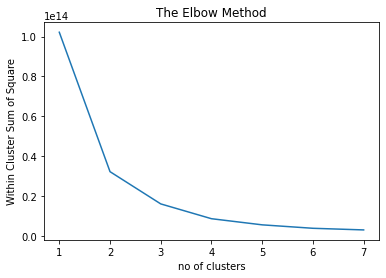

In [ ]:
#Visualizing the ELBOW method to get the optimal value of K 

plt.plot(range(1,8), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('Within Cluster Sum of Square')
plt.show()

In [ ]:

kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=0, max_iter=300)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
kmean_clus = kmeans.labels_
kmean_center = kmeans.cluster_centers_

print(kmean_clus)
print(kmean_center)

## Add the column of clusters i.e. 'kmean_clus' to the original Dataset:

df['kmean_clus'] = kmean_clus

[0 0 0 ... 0 1 1]
[[ 1.18594200e+02  3.29247465e+00  1.96269347e+01  1.89414695e+00
   1.69898595e-01  4.07532432e+03  1.20177371e+02  6.58654207e+03]
 [ 1.13839506e+02  4.00000000e+00  2.41358025e+01 -3.77475828e-15
  -4.71844785e-16  2.03596284e+05  5.49283951e+03  2.78295444e+05]
 [ 1.16166667e+02  4.00000000e+00  2.20000000e+01  6.66133815e-16
   8.32667268e-17  7.05206208e+05  2.82381667e+04  9.84986292e+05]
 [ 1.20231355e+02  4.00000000e+00  2.04520548e+01  1.13242749e-14
   1.63757896e-15  8.04435784e+04  1.85598478e+03  1.10036584e+05]
 [ 1.15865979e+02  4.00000000e+00  1.89587629e+01 -3.33066907e-15
  -2.77555756e-16  4.04643340e+05  1.03112990e+04  5.14833649e+05]]


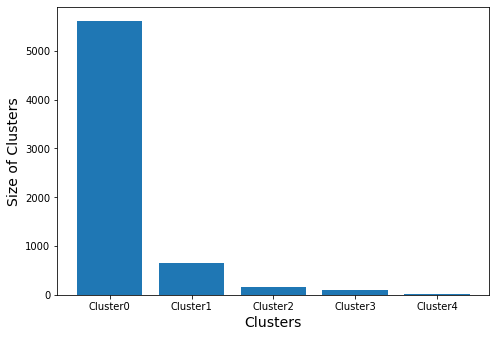

In [ ]:

# Cluster size plot for k means clusters
sizes=df['kmean_clus'].value_counts()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
clust = ['Cluster0', 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']

plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Size of Clusters', fontsize=14)

ax.bar(clust,sizes)
plt.show()

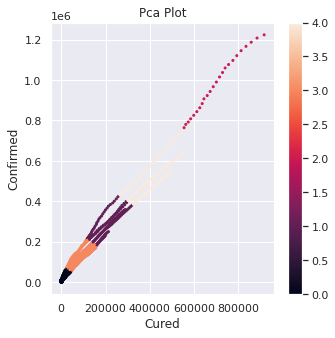

In [ ]:
plot_set=pd.DataFrame()
plot_set['x']=df['Cured']
plot_set['y']=df['Confirmed']
x = plot_set['x']
y = plot_set['y']


sns.set(rc={'figure.figsize':(5,5)})
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=4)
ax.set_title('Pca Plot')
ax.set_xlabel('Cured')
ax.set_ylabel('Confirmed')
plt.colorbar(scatter)

In [ ]:
gmm = GaussianMixture(n_components = 5).fit(df)
em_clus = gmm.predict(df)
gmm_centers=gmm.means_
## Add the column of clusters from GMM i.e. 'em_clus' to the original Dataset:

df['em_clus'] = em_clus

In [ ]:
#Preparing the dataframe that we will use for Forward Selection

f_selection_df = df
f_selection_df.drop(columns=['kmean_clus','em_clus'],axis=1,inplace=True)

In [ ]:

from sklearn.model_selection import train_test_split

x = f_selection_df.drop(columns=['Deaths'],axis=1)
y = f_selection_df[['Deaths']]

xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs



In [ ]:
clf = LogisticRegression() #part of feedback loop (Wrapping Process that we studied in Lecture)

In [ ]:
# Build step forward feature selection
sfs1 = sfs(clf, k_features=7,forward=True, floating=False, verbose=0, scoring='accuracy', cv=3)


In [ ]:
# Perform SFFS
sfs1 = sfs1.fit(xTrain, yTrain)
f_selection_features = list(sfs1.k_feature_names_)


In [ ]:
# Fitting the kmeans model for the column subset i.e features of Forward Selection
kmeans.fit(df[f_selection_features])
f_selection_clus = kmeans.labels_

In [ ]:
## Add the column of clusters i.e. 'f_selection clus' to the original Dataset:

df['f_selection_clus'] = f_selection_clus

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principal_components = pca.fit_transform(df)

explained_var = pca.explained_variance_ratio_
print('Explained Variance Ratio', explained_var)

Explained Variance Ratio [9.96664355e-01 3.28950264e-03 4.58351520e-05 2.94608414e-07
 8.71654629e-09]


In [ ]:
# Fitting the kmeans model for the principal components

kmeans.fit(principal_components)
pca_clus = kmeans.labels_

## Add the column of clusters i.e. 'pca_cluster' to the original Dataset:

df['pca_clusters'] = pca_clus

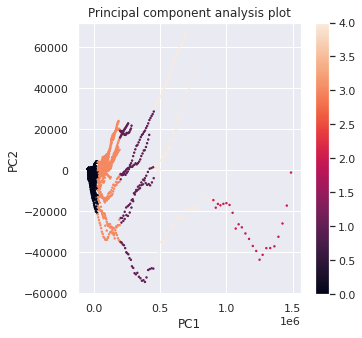

In [ ]:
# kmeans plot - Kmeans followed by PCA
sizes=df['pca_clusters'].value_counts()
plot_set=pd.DataFrame()
plot_set['x']=principal_components[:,0]
plot_set['y']=principal_components[:,1]
plot_set['label']=df['pca_clusters']
x = plot_set['x']
y = plot_set['y']
cluster = plot_set['label']  # Labels of cluster

sns.set(rc={'figure.figsize':(5,5)})

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=cluster,s=2)
ax.set_title('Principal component analysis plot')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.colorbar(scatter)